In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
#import the dataset
dataset = pd.read_csv('AI_daily_totals_0421.csv')
dataset.head(5)
a = dataset['ERNCD'].value_counts()
#print(dataset.isnull().sum())

In [3]:
#find the correlation between dataset features
dataset.corr()

,CNG_MONTH,CNG_YEAR,SUM(HOURS_EARNED)
CNG_MONTH,1.000000,-0.177903,0.010716
CNG_YEAR,-0.177903,1.000000,-0.045184
SUM(HOURS_EARNED),0.010716,-0.045184,1.000000


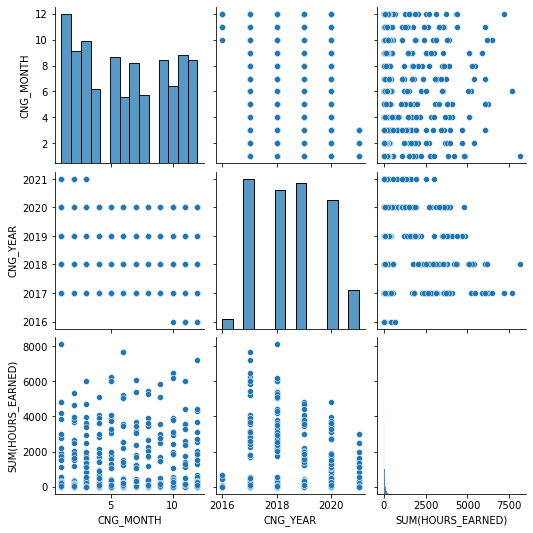

In [4]:
#plot the dataset
sns.pairplot(dataset)

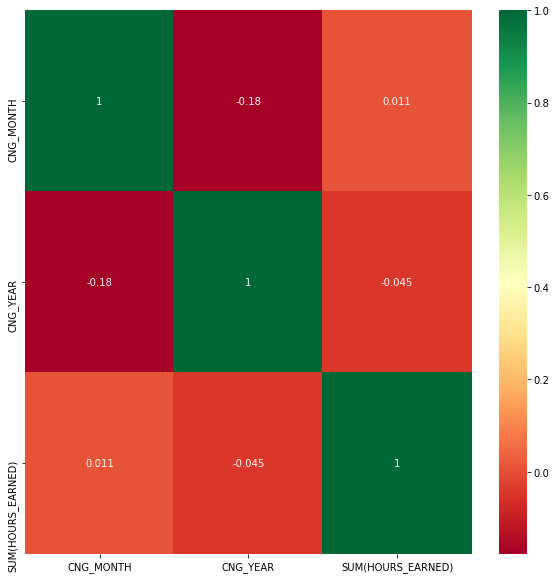

In [5]:
#Find the correlation between the dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(dataset[top_corr_features].corr(),annot = True,cmap = "RdYlGn")

In [6]:
#load the feature variables and dependent variables
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
#y = y.reshape(len(y),1)

In [7]:
#Apply ordinal encoder on the categorial features
from sklearn.preprocessing import OrdinalEncoder
ordered_earncode = ['RFP',
'ATA',
'SDO',
'S10',
'HW2',
'HTW',
'DTP',
'TOT',
'DHO',
'OTP',
'HWP',
'MUN',
'RPP',
'ILH',
'MUE',
'EWC',
'PPD',
'UMP',
'URB',
'MMC',
'UMB',
'EWH',
'FIL',
'DHH',
'IUF',
'ILL',
'VCC',
'UTH',
'SIF',
'MPF',
'IPF',
'FUP',
'HWQ',
'FHH',
'PCH',
'VCN',
'MPE',
'SFF',
'NDH',
'TRG',
'HWM',
'FH1',
'FIF',
'DH1',
'ULB',
'HOP',
'SPP',
'HLW',
'RPH',
'HOM',
'BRH',
'RVP',
'JUH',
'RTP',
'SIU',
'FLD',
'COQ',
'FVI',
'UTU',
'JF0',
'FID',
'PFL',
'EMP',
'VAH',
'MV0',
'THW',
'FEI',
'ILP',
'REG',
'CSM',
'JU0',
'HOH',
'FUI',
'C10',
'LOF',
'MSP',
'WSP',
'PPL']
ordered_location = ['IL0258','GA0244','CA0627']
oie = OrdinalEncoder(categories = [ordered_location, ordered_earncode])
X[:,2:4] = oie.fit_transform(X[:,2:4])
#X = oie.fit_transform(X)

In [8]:
X[17]

array([1, 2017, 2.0, 68.0], dtype=object)

In [9]:
pd.DataFrame(X)

,0,1,2,3
0,1,2017,2,1
1,1,2017,2,8
2,1,2017,2,15
3,1,2017,2,42
4,1,2017,2,31
...,...,...,...,...
3316,12,2020,0,2
3317,12,2020,0,46
3318,12,2020,0,27
3319,12,2020,0,58


In [10]:
#Feature extraction
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[0.0349398  0.1026508  0.05969109 0.80271831]


In [11]:
#Split the dataset into training set and test data set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain ,ytest = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(xtrain)

[[6 2017 0.0 22.0]
 [1 2017 1.0 49.0]
 [2 2017 2.0 52.0]
 ...
 [6 2018 0.0 8.0]
 [10 2018 0.0 30.0]
 [11 2016 1.0 9.0]]


In [12]:
##Hyper parameters
from sklearn.model_selection import RandomizedSearchCV
#RandomizedSearchCV - takes the best parameters from our list
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [13]:
#Creat a random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [14]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [15]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [16]:
rf_random.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [17]:
predictions = rf_random.predict(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

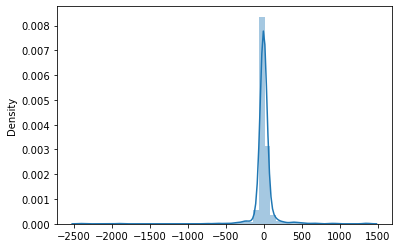

In [18]:
sns.distplot(ytest-predictions)

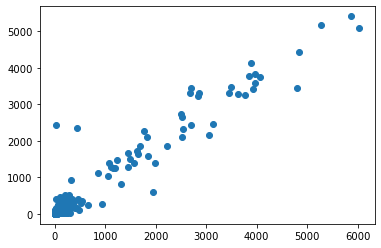

In [19]:
plt.scatter(ytest, predictions)

In [20]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(ytest, predictions))
print('MSE:', metrics.mean_squared_error(ytest, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictions)))
print('R2 score:',metrics.r2_score(ytest, predictions))

MAE: 50.408254293969385
MSE: 23416.90785791517
RMSE: 153.02584049079806
R2 score: 0.9415247138814562


In [21]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [22]:
rf_random.predict([['1','2021','2','68']])

array([1200.9022834])

In [23]:
pd.DataFrame(np.concatenate((predictions.reshape(len(predictions),1),ytest.reshape(len(ytest),1)),1))

,0,1
0,11.051830,3.610000
1,35.804017,8.000000
2,111.302066,145.450000
3,7.241000,3.000000
4,63.715057,65.970000
...,...,...
992,57.170901,74.183337
993,13.342243,8.000000
994,29.858250,7.750000
995,39.779583,21.000000


In [24]:
#Train XGboost model on training set
from xgboost import XGBRegressor
Regressor = XGBRegressor()
Regressor.fit(xtrain, ytrain)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
xgpred = Regressor.predict(xtest)
print('R2 score:',metrics.r2_score(ytest, predictions))

R2 score: 0.9415247138814562


In [26]:
pd.DataFrame(np.concatenate((xgpred.reshape(len(xgpred),1),ytest.reshape(len(ytest),1)),1))

,0,1
0,-0.004309,3.610000
1,29.644199,8.000000
2,47.884823,145.450000
3,6.746922,3.000000
4,85.458961,65.970000
...,...,...
992,61.889473,74.183337
993,-2.070103,8.000000
994,18.238346,7.750000
995,29.971605,21.000000


In [27]:
prd = ['1','2021','2','68']
prd = np.array(prd).reshape((1,-1))
Regressor.predict(prd)

array([1142.6569], dtype=float32)

In [28]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(xtrain, ytrain)

dtpred = dt.predict(xtest)
print('dt_r2score:',metrics.r2_score(ytest, dtpred))

print(dt.predict([['3','2021','2','68']]))

dt_r2score: 0.8934857171833446
[823.86]


In [29]:
X[362]

array([1, 2021, 2.0, 68.0], dtype=object)

In [30]:
dataset.loc[362]

CNG_MONTH                  1
CNG_YEAR                2021
LOCATION              CA0627
ERNCD                    REG
SUM(HOURS_EARNED)    1118.32
Name: 362, dtype: object

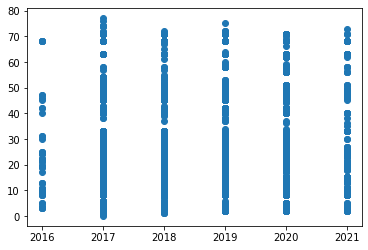

In [79]:
#k-means clustering
#identify the pattern between earn code and hours earned
clus_x = X[:,[1,3]]
clus_x.shape
plt.scatter(clus_x[:,0],clus_x[:,1])

In [86]:
clus_dataset = dataset
clus_dataset.drop(['CNG_MONTH'], axis = 1 , inplace = True)
clus_dataset.drop(['LOCATION'], axis = 1, inplace = True)

In [87]:
clus_dataset.head(5)

,CNG_YEAR,ERNCD,SUM(HOURS_EARNED)
0,2017,ATA,0.000000
1,2017,DHO,13.733331
2,2017,EWC,10.000000
3,2017,FIF,16.000000
4,2017,FUP,48.000000


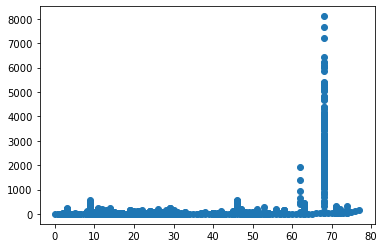

In [94]:
#apply ordinal encoder
clus_x = clus_dataset.iloc[:,[1]].values
clus_y = clus_dataset.iloc[:,-1].values
clus_y = clus_y.reshape(len(clus_y),1)
clus_oie = OrdinalEncoder(categories = [ordered_earncode])
#X[:,2:4] = clus_oie.fit_transform(X[:,2:4])
clus_x = clus_oie.fit_transform(clus_x)
plt.scatter(clus_x, clus_y)

In [95]:
#Apply feature scaling to both clus_x and clus_y
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
clusx = ss.fit_transform(clus_x)
clusy = ss.fit_transform(clus_y)

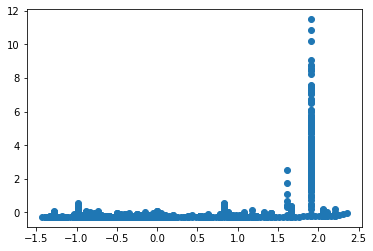

In [97]:
plt.scatter(clusx, clusy)

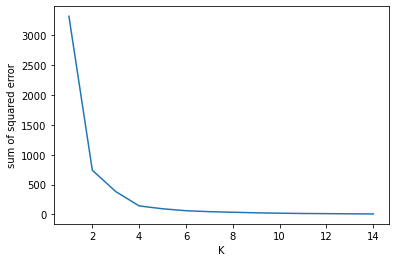

In [100]:
#Find the optimal value of k using elbow method
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
sse = []
k = range(1,15)
for i in k:
    km = KMeans(n_clusters = i)
    km.fit(clusx, clusy)
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(k, sse)

    

In [106]:
#From the above grapth optimal value of k is 4
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
ypredicted = km.fit_predict(clusx, clusy)

In [107]:
ypredicted

array([0, 0, 0, ..., 2, 3, 3])

In [108]:
clus_dataset['clusx'] = clusx
clus_dataset['clusy'] = clusy
clus_dataset['ypredicted'] = ypredicted

In [109]:
print(clus_dataset.head(5))

   CNG_YEAR ERNCD  SUM(HOURS_EARNED)     clusx     clusy  ypredicted
0      2017   ATA           0.000000 -1.377443 -0.268818           0
1      2017   DHO          13.733331 -1.034032 -0.248890           0
2      2017   EWC          10.000000 -0.690620 -0.254307           0
3      2017   FIF          16.000000  0.633968 -0.245600           1
4      2017   FUP          48.000000  0.094321 -0.199166           2


In [122]:
c1 = clus_dataset[clus_dataset.ypredicted == 0]
c2 = clus_dataset[clus_dataset.ypredicted == 1]
c3 = clus_dataset[clus_dataset.ypredicted == 2]
c4 = clus_dataset[clus_dataset.ypredicted == 3]
print(c1['clusy'].shape)

#plt.scatter(c1.clusx, c1.clusy, color = 'blue', label = 'Cluster 1')
#plt.scatter(c3.clusx, c2.clusy, color = 'red', label = 'Cluster 2')
#plt.scatter(c3.clusx, c3.clusy, color = 'green', label = 'Cluster 3')
#plt.scatter(c4.clusx, c4.clusy, color = 'yellow', label = 'Cluster 4')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],km.cluster_centers_[:,3], color = 'purple', marker = '*', label = 'centroid')
#plt.legend()
#plt.title('Clustering of Earn code vs Hours earned')
#plt.show()

(1100,)
